In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def saturation_temperature(pressure):
    pvc = [-51.574, 0.20636, -0.29381e-3, 0.2231e-6, -0.86184e-10, 1.3299e-14]
    tlo = 400.0
    thi = 1800.0
    for j in range(100):
        temp = (tlo+thi)/2.0
        pv = pvc[5]
        for i in range(4,-1,-1):
            pv = temp*pv + pvc[i]
        pv = 10.0*math.exp(pv)  
        #print(j,temp,pv,pressure)
        if (abs(pv-pressure) < 0.001):
            break
        if (pv < pressure):
            tlo = temp
        else:
            thi = temp
    return temp

In [3]:
def fmax(fmx,spec_heat_ratio, inlet_mach):
    phi = (.3403/fmx**0.255)**2
    if (inlet_mach > 1.0):
        phi = (1.0286*math.exp(2.4938*fmx))**2
    for i in range(50):
        checkval = (spec_heat_ratio+1.0)*phi/2./(1.0+(spec_heat_ratio-1.0)/2.*phi)
        f = (1.0-phi)/spec_heat_ratio/phi+(spec_heat_ratio+1.0)/2./spec_heat_ratio*math.log((spec_heat_ratio+1.0)*phi/2./(1.0+(spec_heat_ratio-1.0)/2.*phi))-fmx
        if (abs(f)<0.0001):
            break
        df = (spec_heat_ratio+1.0)/(2.*spec_heat_ratio*phi*(1.0+(spec_heat_ratio-1.0)/2.*phi)) - 1.0/spec_heat_ratio/phi**2
        df1 = (spec_heat_ratio+1.0)/(2.*spec_heat_ratio*phi*(1.0+(spec_heat_ratio-1.0)/2.*phi))
        df2 = 1.0/spec_heat_ratio/phi**2
        phi_new = phi - f/df
        if (phi_new <= 0.0):
            phi_new = 1e-6
        if (inlet_mach < 1.0 and phi_new > 1.0):
            phi_new = 0.9999
        if (inlet_mach >= 1.0 and phi_new < 1.0):
            phi_new = 1.0001
        phi = phi_new
    exit_mach = math.sqrt(phi)
    return exit_mach

In [4]:
def pressure_ratio(mach, spec_heat_ratio):
    pressr = math.sqrt((spec_heat_ratio+1.0)/2./(1.0+(spec_heat_ratio-1.0)/2.*mach**2))/mach
    return pressr

In [5]:
def flmax(mach, spec_heat_ratio):
    fl = (1.0-mach**2)/spec_heat_ratio/mach**2+(spec_heat_ratio+1.0)/2./spec_heat_ratio*math.log((spec_heat_ratio+1.0)*mach**2/2./(1.0+(spec_heat_ratio-1.0)/2.*mach**2))
    return fl

In [6]:
def friction(reynolds):
    if (reynolds>2000 and reynolds <= 20000):
        f= 0.079/reynolds**0.25
    elif (reynolds>20000):
        f = 0.046/reynolds**.2
    else:
        f = 16.0/reynolds
    return f

In [7]:
def fluid_properties(temp):
    #coefficients for potassium
    pvc = [-51.574, 0.20636, -0.29381e-3, 0.2231e-6, -0.86184e-10, 1.3299e-14]
    rholc = [940.43, -0.42954, 0.42662e-3, -0.42981e-6, 0.19884e-9, -3.4521e-14]
    mulc = [0.0016193, -0.55722e-5,0.87656e-8, -0.70683e-11, 2.8447e-15, -4.5263e-19]
    muvc = [0.54558e-5, 0.69661e-8, 0.30725e-10, -3.9354e-14, 1.9365e-17, -3.5469e-21]
    sigc = [0.13127, -6.6e-5, 2.7756e-17, -5.7598e-20, 1.7371e-23, -5.0487e-27]
    hfgc = [2226400.0, 135.36, -0.60104, 0.15934e-3, 0.42749e-7, -0.20228e-10]
    rhovc = [-0.60872e2, 0.19765, -0.28146e-3, 0.21319e-6, -0.82191e-10, 0.1268e-13]
    ctlc = [0.68968e2, -0.36091e-1, -0.35049e-4, 0.60981e-7, -0.34141e-10, 0.66235e-14]
    mwc = 39.1
    rkc = [1.7402, -0.1238e-3]
    pv = pvc[5]
    rhol = rholc[5]
    mul = mulc[5]
    muv = muvc[5]
    sig = sigc[5]
    hfg = hfgc[5]
    rhov = rhovc[5]
    cfluid = ctlc[5]
    for i in range(4,-1,-1):
        pv = temp*pv + pvc[i]
        rhol = temp*rhol + rholc[i]
        mul = temp*mul + mulc[i]
        muv = temp*muv + muvc[i]
        sig = temp*sig + sigc[i]
        hfg = temp*hfg + hfgc[i]
        rhov = temp*rhov + rhovc[i]
        cfluid = temp*cfluid + ctlc[i]
    mw = mwc
    rk = rkc[0]+temp*rkc[1]
    pv = 10.0*math.exp(pv)
    rhol = 0.001*rhol
    muv = 10.0*muv
    hfg = 0.001*hfg
    sig = 1000.0*sig
    rhov = 0.001*math.exp(rhov)
    mul = 10.0*mul
    return pv, rhol, mul, muv, sig, hfg, rhov, cfluid, mw, rk

In [8]:
def dpe_evap(q_total):
    q = q_total / 2.0
    qhfg = q/hfg
    qhfgt = q_total/hfg
    dple = 6.0*mu_l*qhfg*le/(math.pi*rv*a**3*rho_l)
    dv = 2*rv #math.sqrt(4.0*av/math.pi)  #diameter
    vy = qhfgt/rho_v/av
    reyv = 4.0*qhfgt/math.pi/mu_v/dv
    rrn = qhfgt/2./math.pi/le/mu_v
    psi = 0.61*rrn+0.61*rrn/(3.6+rrn) # velocity profile correction factor C
    avis = 16.0/reyv*le/dv
    beta= avis*psi
    dpve = avis*(qhfgt/av)**2/rho_v
    dpie = (qhfgt/av)**2*beta/rho_v
    print("TESTING DPE_EVAP: ",dpie,dpve,dple)
    print(q_total)
    return dpie,dpve,dple

In [9]:
def dpa_adiab(temp, q_total):
    qhfg = q_total/hfg
    dpla = 6.0*mu_l*qhfg*la/(math.pi*rv*a**3*rho_l)
    rm1 = qhfg/av/rho_v/math.sqrt(rbar*temp/mw)  #mach number at exit
    rey = 4.0*qhfg/math.pi/2.0/rv/mu_v
    f = friction(rey)
    if (rm1 > 0.2):
        fl2 = flmax(rm1,rk)-4.0*f*la/2.0/rv
        rm2 = 1.0
        if (fl2 > 0.0):
            rm2 = fmax(fl2,rk,rm1)
    else:
        rm2 = rm1
    if (rm2 > 0.3):
        pr = pressure_ratio(rm1,rk)/pressure_ratio(rm2,rk)
        if (pr <1.0 or pr > 2.08):
            pr = 2.08
        pa2 = pv/pr
        dpa = (pv-pa2)/2.0
    else:
        dpa = 2.0*f*la/(2.0*rv)*qhfg**2/rho_v/av**2
        pa2 = pv-dpa
    tbc = saturation_temperature(pa2)
    return dpla, dpa

In [10]:
def dpc_cond(q_total):
    qhfg = q_total/hfg
    qa = q1_array[i]
    qb = q1_array[i+1]
    lc1 = lc/cinc
    cfract = (distance[i]-le-la)/lc
    qrad = qa-qb
    qhfg1 = (qa+qb)/(2.0*hfg)
    dplc = 6.0*mu_l*qhfg1*lc1/(math.pi*rv*a**3*rho_l)
    rreyc = -qhfg/2.0/math.pi/lc1/mu_v
    reyc = 4.0*qhfg1/math.pi/2.0/rv/mu_v
    vci = qa/hfg/av/rho_v
    vcii = qb/hfg/av/rho_v
    #Busse correction not yet added, check Reynolds
    f = friction(reyc)
    dpvc = 4.0*f*(lc1/2.0)*rho_v*vci**2/(4.0*rv)
    lparam = (2.0*le+4.0*la)/lc
    recov = (rreyc+2.0)/(1.23*rreyc-lparam)
    dpic = -(vci**2-vcii**2)*rho_v*recov
    return dpic, dpvc, dplc

In [11]:
def sonic_limit(temp, q_total):
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(temp)
    qs = q_total/hfg
    for i in range(10):
        reys = 4.0*qs/math.pi/2.0/rv/mu_v
        f = friction(reys)
        fli = 4.0*f*la/2.0/rv
        rmis = fmax(fli,rk,0.0)
        w1 = rmis*math.sqrt(rbar*temp/mw)
        rreys = reys*rv/4.0/le
        ab = 1.22+1.22/(3.6+rreys)
        dpvs = 8.0*mu_v*w1/rv**2*le/2.0
        dpis = rho_v*ab*w1**2
        pos = pv + dpis + dpvs
        te_sonic = saturation_temperature(pos)
        q_sonic = math.sqrt(rho_v*pv)*av*hfg*rmis
        pci = pv/pressure_ratio(rmis,rk)
        tc_sonic = saturation_temperature(pci)
        if abs(q_sonic-qs*hfg)<1.0:
            break
        else:
            qs = q_sonic/hfg
    return q_sonic, pci, tc_sonic

In [12]:
def entrainment_limit(temp,pci,tc_sonic):
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(temp)
    tcie = tc_sonic
    p2e = pci
    z = wire_radius
    for i in range(10):
        rhov1 = mw*p2e/(rbar*tcie)
        w2e = math.sqrt(2.0*math.pi/z/rhov1)
        rm2e = w2e/math.sqrt(rk*rbar/mw*tcie)
        if rm2e > 1.0:
            rm2e = 1.0
        reye = 2.0*rv*rhov1*w2e/mu_v
        f = friction(reye)
        fl2e = 4.0*f*la/2.0/rv
        fl1e = fl2e + flmax(rm2e,rk)
        rm1e = fmax(fl1e,rk,0.0)
        p2e = pv*pressure_ratio(rm2e,rk)/pressure_ratio(rm1e,rk)
        tcie2 = saturation_temperature(p2e)
        if abs(tcie2-tcie)<1.0:
            break
        else:
            tcie = tcie2
    qentrn = math.sqrt(2.0*math.pi*rhov1*sig/z)*hfg*av
    return qentrn

In [13]:
def boiling_limit(temp):
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(temp)
    rnuc = 0.00127  #nucleation site radius
    dtboil = 2.0*sig*temp/(rho_v*hfg*rnuc)
    rkw = eff_pore_radius*cfluid + (1.0-eff_pore_radius)*k_wick
    a1 = 2.0*math.pi*radius_in*le
    dtloq = a/(a1*rkw)
    alv = 2.0*math.pi*(radius_in-a)*le*eff_pore_radius
    r = rbar/mw
    dtlv = (2.0*math.pi)**0.5*r**1.5*temp**2.5/(alv*pv*hfg**2)
    qboil = dtboil/(dtloq+dtlv)
    return qboil

In [14]:
t_sink = 300
q_total = 15122 #total power in watts
le = 50.0
la = 20.0
lc = 50.0
cinc = 10 #increment in condenser
ainc = 6
einc = 10
valuee = 1400
qe_array = [valuee,valuee,valuee,valuee,valuee,valuee,valuee,valuee,valuee,valuee]
#qe_array = [150,150,150,150,150,1500,1500,3000,4000,5000]
q_total = sum(qe_array)
print('q total = ', q_total)
theta = 0.0  #inclination angle
radius_in = 1.75 
wick_porosity = 0.6
k_wick = 0.13
k_wall = 0.13
nucl_radius = 0.00127
radius_out = 1.9
screen_thickness = 0.1
wire_radius = 0.002
annulus_thickness = 0.1
eff_pore_radius = 0.004
h_sink = 0.05
rbar = 8.314e7
grav = 980.0

a = annulus_thickness
cond_area = 2*math.pi*lc*radius_out/cinc #condenser area for each mesh, acondi
abd = math.log(radius_out/radius_in)
abc = math.log(radius_in/(radius_in-annulus_thickness))

icondb = einc+ainc+1 #index of beginning of condenser
iconde = einc+ainc+cinc #index of end of condenser
iadiab = einc+ainc
if (t_sink > 400.0):   #for potassium
    tlow = t_sink
else:
    tlow = 400.0
thigh = 1800.0  # for potassium

q total =  14000


In [15]:
total_mesh = cinc+ainc+einc+1
distance = np.zeros(total_mesh)
dpi_array = np.zeros(total_mesh)
dpv_array = np.zeros(total_mesh)
dpl_array = np.zeros(total_mesh)
dpv_total = np.zeros(total_mesh)
dpa_array = np.zeros(total_mesh)
dp_array = np.zeros(total_mesh)
q1_array = np.zeros(total_mesh)
pvap = np.zeros(total_mesh)
tempx = np.zeros(total_mesh)
for i in range(einc+1):
    distance[i] = i*le/einc
for i in range(einc+1,einc+ainc+1):
    distance[i] = le + (i-(einc))*la/ainc
for i in range(einc+ainc+1,total_mesh):
    distance[i] = le + la + (i-(einc+ainc))*lc/cinc
#only once
rv = radius_in - annulus_thickness - screen_thickness
b = (radius_in+rv+screen_thickness)*math.pi
av = math.pi*rv*rv
rh = a*b/(a+b)
al = a*b
#iteration on T evaporator exit
for k in range(20):
    tguess = (thigh+tlow)/2  # guess temperature at the end of evaporator, iterate until q in equals q out
    ### EVAPORATOR
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(tguess)
    #conduction heat sink
    rcond = (1/h_sink+radius_out*abd/k_wall+radius_in/cfluid*abc)/cond_area  #heat transfer from inside to outside
    dpie,dpve,dple = dpe_evap(q_total)
    dpe = dpie+dpve
    pvap[0] = pv + dpe
    tempx[0]= saturation_temperature(pvap[0])
    for i in range(1,einc+1):  #boundary 1 to 5
        q1_array[i] = q1_array[i-1]+qe_array[i-1]
        dpie,dpve,dple = dpe_evap(q1_array[i])
        dpi_array[i] = dpie
        dpv_array[i] = dpve
        dpl_array[i] = dple
        dpe = dpi_array[i]+dpv_array[i]
        pvap[i] = pvap[0]-dpe
        tempx[i] =saturation_temperature(pvap[i])
        dpv_total[i] = dpv_array[i]+dpi_array[i]+dpa_array[i]
    ### ADIABATIC
    dpla, dpa = dpa_adiab(tguess, q_total)
    # print(k," -- DPLA: ",dpla," , DPA: ",dpa)
    for i in range (einc+1,iadiab+1):  # boundary 6 and 8
        afract = (distance[i]-le)/la
        dpa_array[i] = dpa*afract
        dpl_array[i] = dpl_array[i-1] + dpla/ainc
        q1_array[i] = q1_array[i-1]
        dpi_array[i] = dpi_array[i-1]
        dpv_array[i] = dpv_array[i-1]
        pvap[i] = pvap[einc] - dpa_array[i]
        tempx[i] = saturation_temperature(pvap[i])
        dpv_total[i] = dpv_array[i]+dpi_array[i]+dpa_array[i]
    pvap[icondb-1] = pv-dpa
    tempx[icondb-1] = saturation_temperature(pvap[icondb-1])
    q1_array[icondb-1] = q_total
    ### CONDENSOR - convective coupling
    qcond = 0.0
    for i in range(icondb-1,iconde):
        qout = (tempx[i]-t_sink)/rcond   #heat out in mesh i
        if (qout < 0.0):    #if t_sink > tempx, guess temperature is too high
            print('ierror 2')
            thigh = tguess
            break
        qcond = qcond + qout
        q1_array[i+1] = q1_array[i]-qout
        dpic,dpvc, dplc = dpc_cond(q_total)
        dpc = dpic+dpvc
        ### end of dpcond
        pvap[i+1] = pvap[i]-dpc
        if (pvap[i+1] < 0.0):
            print('ierror 3')
            break
        tempx[i+1] = saturation_temperature(pvap[i+1])
        pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(tempx[i+1])
        #conduction heat sink
        rcond = (1/h_sink+radius_out*abd/k_wall+radius_in/cfluid*abc)/cond_area  #heat transfer from inside to outside
        dpi_array[i+1] = dpi_array[i]+dpic
        dpv_array[i+1] = dpv_array[i]+dpvc
        dpa_array[i+1] = dpa_array[i]
        dpl_array[i+1] = dpl_array[i]+dplc
        dpv_total[i+1] = dpv_total[i]+dpc
    if abs((qcond-q_total)/q_total)<0.001:
        print('Converged ', k, qcond, q_total, tguess)
        break
    elif (qcond > q_total):
        thigh = tguess
    else:
        tlow = tguess
    print('iteration ', k, qcond,q_total, tguess)
#add limit checks
# capillary, sonic, boiling and entrainment limits
if (min(pvap) < max(dpv_total)):
    print('Capillary limit exceeded')
q_sonic, pci, tc_sonic = sonic_limit(tguess,q_total)
if (q_total > q_sonic):
    print('Sonic limit exceeded')
q_entrn = entrainment_limit(tguess, pci,tc_sonic)
if (q_total > q_entrn):
    print('Entrainment limit exceeded')
q_boil = boiling_limit(tguess)
print(q_boil)
for i in range(len(tempx)):
    print(distance[i],tempx[i],q1_array[i],dpv_total[i])

TESTING DPE_EVAP:  1421.7637740998134 20.15045732599842 437.97050669210245
14000
TESTING DPE_EVAP:  15.034002687922861 2.0150457325998423 43.79705066921024
1400.0
TESTING DPE_EVAP:  58.51873164413458 4.030091465199685 87.59410133842049
2800.0
TESTING DPE_EVAP:  130.2244203620483 6.045137197799528 131.39115200763075
4200.0
TESTING DPE_EVAP:  230.1343515650842 8.06018293039937 175.18820267684097
5600.0
TESTING DPE_EVAP:  358.2443918646831 10.07522866299921 218.98525334605122
7000.0
TESTING DPE_EVAP:  514.5530264821552 12.090274395599057 262.7823040152615
8400.0
TESTING DPE_EVAP:  699.05956908084 14.1053201281989 306.5793546844717
9800.0
TESTING DPE_EVAP:  911.7636635370416 16.12036586079874 350.37640535368195
11200.0
TESTING DPE_EVAP:  1152.6651066704972 18.135411593398583 394.17345602289214
12600.0
TESTING DPE_EVAP:  1421.7637740998134 20.15045732599842 437.97050669210245
14000.0
iteration  0 22519.75076985606 14000 1100.0
TESTING DPE_EVAP:  54810.90966815505 688.1941622191995 517.96760

53.333333333333336 790.118625946343 14000.0 30621.010579996335
56.666666666666664 789.2110761255026 14000.0 31398.728079879245
60.0 788.2926899939775 14000.0 32176.445579762156
63.333333333333336 787.3631794005632 14000.0 32954.16307964507
66.66666666666667 786.422236636281 14000.0 33731.880579527984
70.0 785.4695409536362 14000.0 34509.59807941089
75.0 789.4688684493303 12633.42531715348 31178.745749530386
80.0 793.011112511158 11255.5924743368 28080.512614313997
85.0 795.9072381258011 9867.788916183868 25440.44727489901
90.0 798.2698824256659 8471.833345066985 23213.349744172403
95.0 800.1760769635439 7069.227408567488 21367.356512928673
100.0 801.6794921830297 5661.255923401973 19879.87258819414
105.0 802.8174951672554 4249.052633087747 18735.15890095231
110.0 803.6153271794319 2833.646099167142 17922.870852431224
115.0 804.0885914117098 1415.9938333231812 17437.20539368503
120.0 804.243003949523 -2.990573118804832 17278.12596926246


In [16]:
fmt = '{:{f}}  {:{f}}  {:{f}}  {:{f}}'
for i in range(total_mesh):
    print(fmt.format(distance[i],tempx[i],q1_array[i],dpv_total[i], f='8.2f'))

    0.00    819.48      0.00      0.00
    5.00    819.20   1400.00    348.24
   10.00    818.44   2800.00   1285.76
   15.00    817.19   4200.00   2808.47
   20.00    815.43   5600.00   4916.10
   25.00    813.12   7000.00   7608.59
   30.00    810.22   8400.00  10885.90
   35.00    806.66   9800.00  14748.03
   40.00    802.36  11200.00  19194.98
   45.00    797.20  12600.00  24226.73
   50.00    791.02  14000.00  29843.29
   53.33    790.12  14000.00  30621.01
   56.67    789.21  14000.00  31398.73
   60.00    788.29  14000.00  32176.45
   63.33    787.36  14000.00  32954.16
   66.67    786.42  14000.00  33731.88
   70.00    785.47  14000.00  34509.60
   75.00    789.47  12633.43  31178.75
   80.00    793.01  11255.59  28080.51
   85.00    795.91   9867.79  25440.45
   90.00    798.27   8471.83  23213.35
   95.00    800.18   7069.23  21367.36
  100.00    801.68   5661.26  19879.87
  105.00    802.82   4249.05  18735.16
  110.00    803.62   2833.65  17922.87
  115.00    804.09   1415

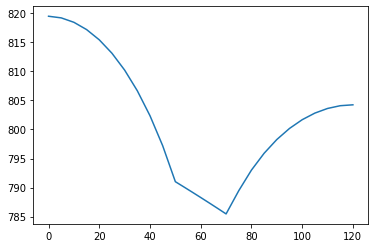

In [17]:
plt.plot(distance,tempx)

In [18]:
q1_array

array([ 0.00000000e+00,  1.40000000e+03,  2.80000000e+03,  4.20000000e+03,
        5.60000000e+03,  7.00000000e+03,  8.40000000e+03,  9.80000000e+03,
        1.12000000e+04,  1.26000000e+04,  1.40000000e+04,  1.40000000e+04,
        1.40000000e+04,  1.40000000e+04,  1.40000000e+04,  1.40000000e+04,
        1.40000000e+04,  1.26334253e+04,  1.12555925e+04,  9.86778892e+03,
        8.47183335e+03,  7.06922741e+03,  5.66125592e+03,  4.24905263e+03,
        2.83364610e+03,  1.41599383e+03, -2.99057312e+00])

In [19]:
distance

array([  0.        ,   5.        ,  10.        ,  15.        ,
        20.        ,  25.        ,  30.        ,  35.        ,
        40.        ,  45.        ,  50.        ,  53.33333333,
        56.66666667,  60.        ,  63.33333333,  66.66666667,
        70.        ,  75.        ,  80.        ,  85.        ,
        90.        ,  95.        , 100.        , 105.        ,
       110.        , 115.        , 120.        ])

In [20]:
dpv_total

array([    0.        ,   348.2410069 ,  1285.76131773,  2808.472303  ,
        4916.10262552,  7608.5863384 , 10885.8994702 , 14748.03121281,
       19194.97597668, 24226.73058045, 29843.29308011, 30621.01058   ,
       31398.72807988, 32176.44557976, 32954.16307965, 33731.88057953,
       34509.59807941, 31178.74574953, 28080.51261431, 25440.4472749 ,
       23213.34974417, 21367.35651293, 19879.87258819, 18735.15890095,
       17922.87085243, 17437.20539369, 17278.12596926])

In [21]:
pvap

array([85258.54232356, 84910.30131665, 83972.78100582, 82450.07002056,
       80342.43969803, 77649.95598516, 74372.64285336, 70510.51111075,
       66063.56634687, 61031.8117431 , 55415.24924344, 54637.53174356,
       53859.81424368, 53082.09674379, 52304.37924391, 51526.66174403,
       50748.94424415, 54079.79657403, 57178.02970924, 59818.09504866,
       62045.19257938, 63891.18581063, 65378.66973536, 66523.3834226 ,
       67335.67147112, 67821.33692987, 67980.41635429])

In [22]:
dpi_array

array([    0.        ,   310.38269433,  1210.0446926 ,  2694.89736529,
        4764.66937525,  7419.29477555, 10658.74959479, 14483.02302483,
       18892.10947614, 23886.00576734, 29464.70995443, 29464.70995443,
       29464.70995443, 29464.70995443, 29464.70995443, 29464.70995443,
       29464.70995443, 25860.33622165, 22528.19051643, 19705.9507321 ,
       17339.52808765, 15389.9360307 , 13828.58589189, 12634.46329381,
       11792.36833499, 11291.80279666, 11126.28209936])

In [23]:
dpv_array

array([   0.        ,   37.85831257,   75.71662514,  113.57493771,
        151.43325027,  189.29156284,  227.14987541,  265.00818798,
        302.86650055,  340.72481312,  378.58312568,  378.58312568,
        378.58312568,  378.58312568,  378.58312568,  378.58312568,
        378.58312568,  652.10452859,  886.01709859, 1068.19154351,
       1207.51665722, 1311.11548293, 1384.981697  , 1434.39060785,
       1464.19751814, 1479.09759773, 1485.5388706 ])

In [24]:
dpa_array

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,  777.71749988,
       1555.43499977, 2333.15249965, 3110.86999953, 3888.58749941,
       4666.3049993 , 4666.3049993 , 4666.3049993 , 4666.3049993 ,
       4666.3049993 , 4666.3049993 , 4666.3049993 , 4666.3049993 ,
       4666.3049993 , 4666.3049993 , 4666.3049993 ])

In [25]:
dpl_array

array([   0.        ,   50.02819947,  100.05639895,  150.08459842,
        200.1127979 ,  250.14099737,  300.16919685,  350.19739632,
        400.22559579,  450.25379527,  500.28199474,  566.98626071,
        633.69052667,  700.39479264,  767.0990586 ,  833.80332457,
        900.50759054,  995.680613  , 1081.14844826, 1156.51664926,
       1221.80944063, 1277.04137553, 1322.22107412, 1357.35344739,
       1382.4410659 , 1397.48501388, 1402.48541017])